In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
from functools import reduce
import numpy as np
%matplotlib inline

In [2]:
def sacarinfo(name):    
    gt2=pd.read_csv(name)
    gt2.set_index('met',inplace=True)
    gtt=gt2.transpose()
    xy=gtt.astype(bool).sum(axis=1)
    xy2=xy[xy!=0]
    xy3=pd.DataFrame({'prev':xy2}).reset_index()
    i=gtt.sum(axis=1)/140
    i2=i[i!=0]
    i3=pd.DataFrame({'detec':i2}).reset_index()
    u=pd.merge(xy3,i3,how='outer',on='index').sort_values('detec',ascending=False)
    return(u)

In [3]:
tables=[sacarinfo('matrixnormmetalpha0.5newmethod'+i+'.csv') for i in ['marinephantome','estuarinephantome','freshwaterphantome']]
for tab,tic in zip(tables,['Marine/Phantome','Estuarine/Phantome','Freshwater/Phantome']):
    tab['Biome']=tic
ye=reduce(lambda x,y: pd.concat([x,y]),tables)

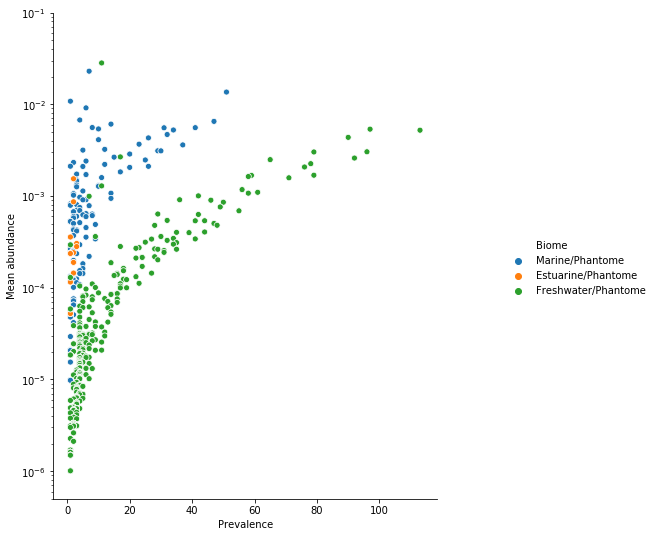

In [4]:
ax=sns.relplot(x='prev',y='detec',data=ye,hue='Biome')
ax.set(yscale='log')
ax.set(ylim=(5e-7,1e-1))
ax.set(xlabel='Prevalence',ylabel='Mean abundance')
fig = plt.gcf()
fig.set_size_inches(10, 8,forward=True)
plt.show()